# EDA first steps

EDA means Exploratory Data Analysis. It is an important step of any project that will give you an idea of the contents of your dataset so that that you can decide on what method to use to extract the relevant information. There are two parts in EDA: first you have to verify the content and formatting of your data and second you need to visualize it to get some insight into relations between variables and their distributions.

## Dataset

Of course the first task is to import the dataset or access it. In this course we always import simple csv files or have a folder full with images that we can import. However in most professional cases, the dataset is embedded in a database and you might need to do some work to get access to the data.

To illustrate the first steps of EDA we import here a small "made-up" dataset that make it easy to understand potential problems. It just contains some information about classical composers:

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np

In [23]:
composer_url = 'https://github.com/guiwitz/NumpyPandas_course/blob/master/Data/composers.xlsx?raw=true'
composers = pd.read_excel(composer_url, sheet_name=1)
composers

,composer,birth,death,city
0,Mahler,1860.0,1911,Kaliste
1,Beethoven,1770.0,1827,Bonn
2,Puccini,1858.0,1924,Lucques
3,Shostakovich,1906.0,1975,Saint-Petersburg
4,Sibelius,10.0,unknown,unknown
5,Haydn,NaN,NaN,Röhrau


## Checking the data

The first thing we have to check is the type of data we have in the table. We can easily do this with the ```dtypes``` parameter:

In [24]:
composers.dtypes

composer     object
birth       float64
death        object
city         object
dtype: object

We see that the death column is an *object* column, which means non-numerical or text. However it should really be a number! The problem is that some values are missing, and Pandas doesn't know what to do with those. The birth column also has a missing value, but it is recognized as *Not a Number* and Pandas can deal with it. The death column in contrast has a text value ```unknown```. How can we fix this? We can for example ```replace``` some values:

In [28]:
composers.death.replace('unknown', np.nan)

0    1911.0
1    1827.0
2    1924.0
3    1975.0
4       NaN
5       NaN
Name: death, dtype: float64

Of course we actually need to assign these new column to our dataframe:

In [30]:
composers.death = composers.death.replace('unknown', np.nan)

In [31]:
composers

,composer,birth,death,city
0,Mahler,1860.0,1911.0,Kaliste
1,Beethoven,1770.0,1827.0,Bonn
2,Puccini,1858.0,1924.0,Lucques
3,Shostakovich,1906.0,1975.0,Saint-Petersburg
4,Sibelius,10.0,NaN,unknown
5,Haydn,NaN,NaN,Röhrau


What should we do now with those NaN values? In some cases we can just leave them and they are just discarded. For example we can ask Pandas to compute the mean of the columns and it just discards those values.

In [33]:
composers.mean()

birth    1480.80
death    1909.25
dtype: float64

If there are only a few values and we made sure they are not "important" (e.g. they do not represent a very specific class of data), we can just discard them. Again, we can use Pandas for this:

In [34]:
composers = composers.dropna()
composers

,composer,birth,death,city
0,Mahler,1860.0,1911.0,Kaliste
1,Beethoven,1770.0,1827.0,Bonn
2,Puccini,1858.0,1924.0,Lucques
3,Shostakovich,1906.0,1975.0,Saint-Petersburg


Now that we have cleaned-up the table, we can also adjust some columns. For example birth and death columns are floats (numbers with a comma). However they obviously could be treated as integers (this can make computations faster sometimes). We can therefore change their type:

In [37]:
composers.birth = composers.birth.astype(int)

In [39]:
composers

,composer,birth,death,city
0,Mahler,1860,1911.0,Kaliste
1,Beethoven,1770,1827.0,Bonn
2,Puccini,1858,1924.0,Lucques
3,Shostakovich,1906,1975.0,Saint-Petersburg


## Visualize relations between data

To understand relationships between features as well as their distributions we can could plot histograms and scatter plots for all of them. Instead of doing this manually, we can use a very useful Seaborn function called pair-plot. To get interesting plots we now turn back to our wine dataset:

In [40]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

We use ```sns.pairplot``` only on a few columns of the dataset so that we can better see the plots:

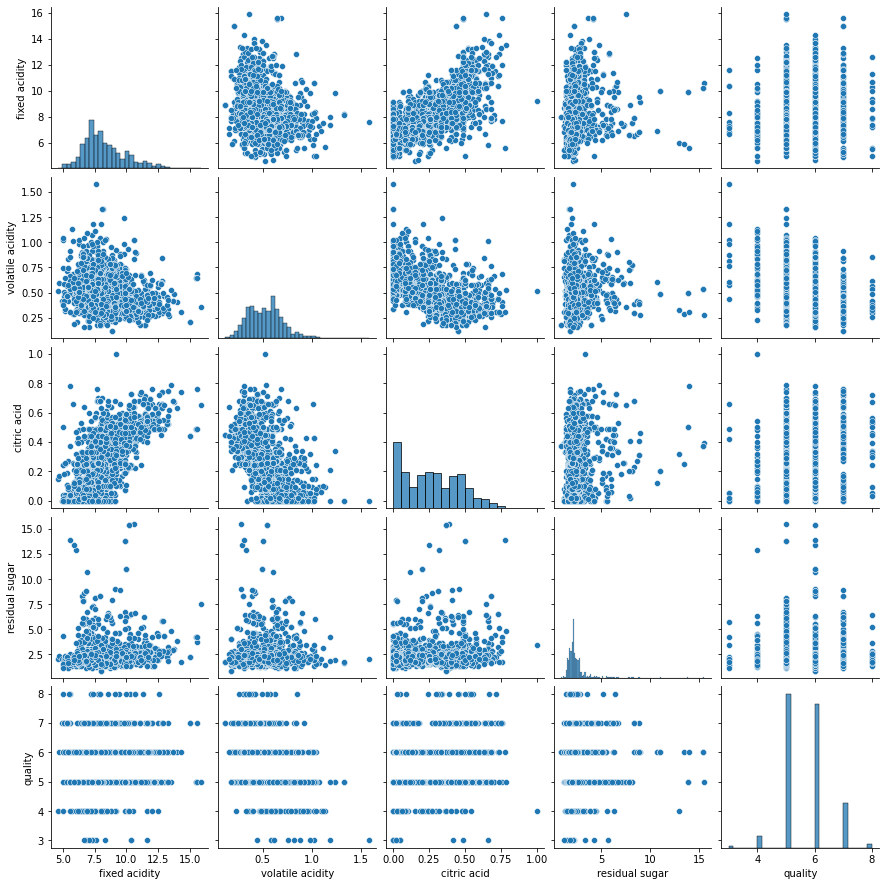

In [41]:
sns.pairplot(wine.iloc[:,[0, 1, 2, 3, -1]]);

As you can see this provides us on the diagonal a histogram for each feature in the DataFrame and at other positions a scatter plot for all possible pairs of variables. This type of plot can give us visually already a lot of information. For example:

- citric acid and fixed acidity seem highly correlated. If we want to simplify our dataset, we can probably discard one of these features
- the histogram of residual sure has what looks like a normal distribution as well as a long tail on the right. These are probably outliers (sweet wines) that we should discard in an analysis
- we see the effect of sugar outliers in the whole last column. If we try to estimate the relation between sugar and fixed acidity, those outliers will affect a lot our estimates
- citric acid seems to have an over-representation of wines with very low (or no?) citric acid. We should also be careful with such cut-off effects that can bias our models
- We see that the quality feature is very imbalanced: we have a lot of 5-6 wines but few at 4 and 7. If we create a model that should predict graded from features we should be careful. A dumb model would just always predict 5-6 and be right most of the time!

## Next steps

As next step, we might want to correct for some of the above observations (e.g. remove outliers). We will see practical example later on when we try to use ML methods. 

## Exercise

1. Import the dataset you can find at this url: https://raw.githubusercontent.com/guiwitz/EHML/main/datasets/kc_house_data.csv. It is a dataset about the price of houses in California with information such as number bedrooms, surface etc..

2. Use the ```pairplot``` function to looks at relations between variables. Use only the columns 1 to 8 to avoid having too many plots (ignore the first column which is only an index).

3. What do you observe in the relation between the variables ```price``` vs ```sqft_living```? Do you think you can predict the price with the ```sqft_living``` variable?

4. The bedroom distribution (on the diagonal) is strange. Make a single histogram (```sns.histplot```) with just this variable. Does the plot look ok? If not what can you try to adjust and why?

5. Do we have the same number of houses with all number of bedrooms? If not, how could this be a problem in the frame of Machine Learning?